# Export statischer Bilder

Bokeh unterstützt den Export von PNG und SVG.

## PNG-Export

Bokeh unterstützt das Exportieren eines Plots oder Layouts in das PNG-Bildformat mit der Funktion `export_png`. Diese Funktion enthält ein zu exportierendes Bokeh-Objekt und einen Dateinamen, in den die PNG-Ausgabe geschrieben werden soll. Häufig handelt es sich bei dem an `export_png` übergebenen Bokeh-Objekt um eine einzelne Darstellung, dies muss jedoch nicht sein. Wenn ein Layout exportiert wird, wird das gesamte Layout in einem PNG-Bild gespeichert.

Die PNG-Exportfunktion erfordert die Installation einiger zusätzlicher Abhängigkeiten, z.B.:

``` bash
$ spack env activate python-38
$ spack install py-selenium@3.141.0%gcc@11.2.0
$ py-pillow@8.0.0%gcc@11.2.0~freetype~imagequant+jpeg~jpeg2000~lcms~tiff~webp~webpmux~xcb+zlib
```

Nach der Installation von Selenium müsst ihr das [geckodriver](https://github.com/mozilla/geckodriver/releases)-Binary herunterladen und installieren. Stellt sicher, dass `geckodriver` in `PATH` verfügbar ist. Weitere Informationen findet ihr in der [geckodriver-Dokumentation](https://firefox-source-docs.mozilla.org/testing/geckodriver/Usage.html). Schließlich muss auch noch Firefox auf eurem System verfügbar sein.

In [1]:
import pandas as pd

from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL


df = pd.DataFrame(AAPL)
df["date"] = pd.to_datetime(df["date"])

In [2]:
from bokeh.io import export_png


p = figure(width=800, height=250, x_axis_type="datetime")
p.line(df["date"], df["close"], color="navy", alpha=0.5)

export_png(p, filename="plot.png")

'/Users/veit/cusy/trn/pyviz-tutorial/docs/bokeh/embedding-export/plot.png'

## SVG Export

Bokeh kann auch SVG-Ausgaben im Browser generieren, anstatt HTML-`canvas`-Elemente zu rendern. Dies wird durch Setzen von `output_backend='svg'` für eine `figure` erreicht. Anschließend kann das SVG entweder mit `output_file` in HTML-Dateien oder in mit `components` erstellten Inhalten eingebettet werden. Alternativ können mit `export_svgs` auch `.svg`-Dateien erstellt werden. Beachten Sie, dass für jedes HTML-`canvas`-Element eine SVG-Datei erstellt wird; es ist jedoch nicht möglich, vollständige Layouts oder Widgets in einer SVG-Datei zu erstellen.

In [3]:
from bokeh.io import export_svgs


p = figure(width=800, height=250, x_axis_type="datetime", output_backend="svg")
p.line(df["date"], df["close"], color="navy", alpha=0.5)

export_svgs(p, filename="plot.svg")

['plot.svg']

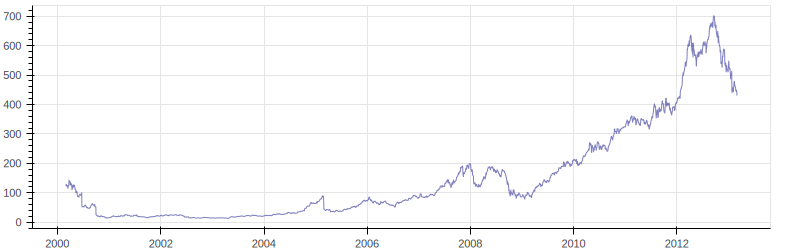

In [4]:
from IPython.display import SVG


SVG("plot.svg")